In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import *
from PossiblePaths import *
from BackgroundValues import *
from random import uniform
import random
import matplotlib
import pickle
import math 
import time #to save figs automatically time.strftime("%Y_%m_%d_%s")
#%matplotlib auto

In [2]:
def RunOneRay_nopix(Lamd,Nsize,spo): #no pixels
    n = 1
    r = 0
    Rays = makeraysVERTICAL(spo,r,n) 
    #jx,jy = gridlines(7.9375,[160.375,-113],200) #these are now the PIXELS
    #Pix = MakePixels(jx,jy) #center of each pixel
    Ij = []
    Delay = []
    for y in np.linspace(-18,18,int(Nsize)): #nsize being number of positions of mirror
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        Ext = 0
        Eyt = 0
        for i in range(len(OutRays)): #per ray IN THIS PIXEL
            I = OutRays[i][1]
            thet = OutRays[i][0]
            phase = np.exp(1j*(OutRays[i][4]*2*np.pi/Lamd)) #factor of 2??
            Ex1 = np.sqrt(I)*np.cos(thet)
            Ey1 = np.sqrt(I)*np.sin(thet)
            Ex = Ex1*phase
            Ey = Ey1*phase
            Ext = Ext + Ex
            Eyt = Eyt + Ey
        PTot = PTot + (Ext*Ext.conjugate()).real + (Eyt*Eyt.conjugate()).real
        Delay.append(y*0.95630475596*4)
        Ij.append(PTot)
    return Delay,Ij

In [15]:
Timei = time.time()
Lamd = 3.32
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.]
#XY = [spo1[0],spo1[1]]
#print(XY)
    
Delay_1Center,Ij_1Center = RunOneRay_nopix(Lamd,Nsize,spo)
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')

total time: ~ 0.36388683319091797 mins


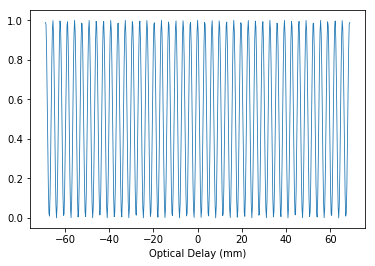

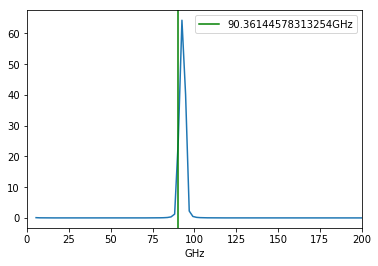

In [36]:
d1 = Ij_1Center
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay_1Center,Ij_1Center,linewidth = .8) 
pl.tick_params(colors = 'black')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('1CenterRayInt.png',dpi=1000)
pl.show() 
pl.plot(300*f[3:],u[2:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.xlim(0,200)
pl.legend()
#pl.savefig('1CenterRaySpec.png',dpi=1000)
pl.show()
#with one ray

def RunOneRay_nopix(Lamd,Nsize,spo): #no pixels
    n = 1
    r = 0
    Rays = makerays(spo,thetG,r,n) 
    #jx,jy = gridlines(7.9375,[160.375,-113],200) #these are now the PIXELS
    #Pix = MakePixels(jx,jy) #center of each pixel
    Ij = []
    Delay = []
    for y in np.linspace(-18,18,int(Nsize)): #nsize being number of positions of mirror
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        Ext = 0
        Eyt = 0
        for i in range(len(OutRays)): #per ray IN THIS PIXEL
            I = OutRays[i][1]
            thet = OutRays[i][0]
            phase = np.exp(1j*(OutRays[i][4]*2*np.pi/Lamd)) #factor of 2??
            Ex1 = np.sqrt(I)*np.cos(thet)
            Ey1 = np.sqrt(I)*np.sin(thet)
            Ex = Ex1*phase
            Ey = Ey1*phase
            Ext = Ext + Ex
            Eyt = Eyt + Ey
        PTot = PTot + (Ext*Ext.conjugate()).real + (Eyt*Eyt.conjugate()).real
        Delay.append(y*0.95630475596*4)
        Ij.append(PTot)
    return Delay,Ij

def RunOneRay_nopixMult(Lamd,Nsize,spo,RayNums):
    Ij = []
    for i in range(RayNums):
        Delay,Ij1 = RunOneRay_nopix(Lamd,Nsize,spo)
        if not Ij: #if is empty
            Ij = Ij1
        else:
            Ij = [Ij[i]+Ij1[i] for i in range(len(Ij1))]
    return Delay,Ij
        

Timei = time.time()
Lamd = 3.32
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.]
#XY = [spo1[0],spo1[1]]
#print(XY)
    
Delay,Ij = RunOneRay_nopixMult(Lamd,Nsize,spo,10)
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')

pl.plot(Delay,Ij,linewidth = .8) 
pl.show()

In [19]:
def RunOneRay_NoPix(Lamd,Nsize,spo): 
    n = 500
    r = 0
    thetG = [0,0,0]
    #Rays = makeraysVERTICAL(spo,r,n) 
    Rays = makerays(spo,thetG,r,n) 
    #jx,jy = gridlines(7.9375,[160.375,-113],200) #these are now the PIXELS
    #Pix = MakePixels(jx,jy) #center of each pixel
    Ij = []
    Delay = []
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        #Overlap = gaussoverlap(OutRays[0],OutRays[5],3.3) #two paths that hit two different spots 
        #for j in range(len(Pix)): #per PIXEL
        for j in range(1):
            Ex4i = 0 #adding PER PIXEL from parts of RAYS in this PIXEL
            Ey4i = 0 #THIS IS WHERE THEY WILL INTERFERE
            for i in range(len(OutRays)): #per ray IN THIS PIXEL
                I = OutRays[i][1]
                thet = OutRays[i][0]
                phase = np.exp(1j*(OutRays[i][4]*2*np.pi/Lamd)) #factor of 2??
                Ex1 = np.sqrt(I)*np.cos(thet)
                Ey1 = np.sqrt(I)*np.sin(thet)
                Ex = Ex1*phase
                Ey = Ey1*phase
                #doing summation over entire detector
                #sig,mux,muy = MakeGaussian(OutRays[i],Lamd)
                #Gr = Airygaussian3dNORM(Pix[j][0],Pix[j][1],sig,mux,muy)
                Gr = 1
                Ex4i = Ex4i + Gr*Ex
                Ey4i = Ey4i + Gr*Ey
            PTot = PTot + (Ex4i*Ex4i.conjugate()).real + (Ey4i*Ey4i.conjugate()).real
        Delay.append(y*0.95630475596*4)
        Ij.append(PTot)
    return Delay,Ij

In [5]:
Timei = time.time()
Lamd = 3.32
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.]
#XY = [spo1[0],spo1[1]]
#print(XY)
thetG = [0,0,0]
    
Delay,Ij = RunOneRay_NoPix(Lamd,Nsize,spo)
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')

total time: ~ 189.69660702149073 mins


# below is the run with all initial phase = 0

In [24]:

def FSRay(specnum,sourcepoint,sourcethet,origin):
    originG = [0,0,0]
    Rays = []
    if type(sourcepoint[0]) is int or type(sourcepoint[0]) is float or type(sourcepoint[0]) is numpy.float64:
        for i in range(0,specnum):
            v1 = specRestricted(1)
            vx,vy,vz = sep(v1)
            v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
            v2 = sepop(v1x,v1y,v1z)
            #Ex,Ey,thet1 = InitialPolarization()
            thet1 = 0
            spT = [sourcepoint[0],sourcepoint[1],sourcepoint[2]]
            Ray = [thet1,1.0,spT,v2[0],0]
            Rays.append(Ray)
        return Rays
    else:
        for i in range (0,specnum):
            v1 = specRestricted(1)
            vx,vy,vz = sep(v1)
            v1x,v1y,v1z = transformLG(vx,vy,vz,originG,sourcethet)
            v2 = sepop(v1x,v1y,v1z)
            j = random.randint(0,len(sourcepoint[0])-1)
            spT = [sourcepoint[0][j],sourcepoint[1][j],sourcepoint[2][j]]
            #Ex,Ey,thet1 = InitialPolarization()
            thet1 = 0
            Ray = [thet1,1.0,spT,v2[0],0]
            Rays.append
            
def RunOneRay_NoPix(Lamd,Nsize,spo):
    n = 500
    r = 0
    thetG = [0,0,0]
    #Rays = makeraysVERTICAL(spo,r,n) 
    Rays = makerays(spo,thetG,r,n) 
    #jx,jy = gridlines(7.9375,[160.375,-113],200) #these are now the PIXELS
    #Pix = MakePixels(jx,jy) #center of each pixel
    Ij = []
    Delay = []
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        #Overlap = gaussoverlap(OutRays[0],OutRays[5],3.3) #two paths that hit two different spots 
        #for j in range(len(Pix)): #per PIXEL
        for j in range(1):
            Ex4i = 0 #adding PER PIXEL from parts of RAYS in this PIXEL
            Ey4i = 0 #THIS IS WHERE THEY WILL INTERFERE
            for i in range(len(OutRays)): #per ray IN THIS PIXEL
                I = OutRays[i][1]
                thet = OutRays[i][0]
                phase = np.exp(1j*(OutRays[i][4]*2*np.pi/Lamd)) #factor of 2??
                Ex1 = np.sqrt(I)*np.cos(thet)
                Ey1 = np.sqrt(I)*np.sin(thet)
                Ex = Ex1*phase
                Ey = Ey1*phase
                #doing summation over entire detector
                #sig,mux,muy = MakeGaussian(OutRays[i],Lamd)
                #Gr = Airygaussian3dNORM(Pix[j][0],Pix[j][1],sig,mux,muy)
                Gr = 1
                Ex4i = Ex4i + Gr*Ex
                Ey4i = Ey4i + Gr*Ey
            PTot = PTot + (Ex4i*Ex4i.conjugate()).real + (Ey4i*Ey4i.conjugate()).real
        Delay.append(y*0.95630475596*4)
        Ij.append(PTot)
    return Delay,Ij

# below is running WEDNESDAY MARCH 27TH 5PM 
# INITIAL PHASE ALL = 0 
# ALL SUMMED BEFORE SQUARED
# PROBABILITY DISTRIBUTION INTERFERENCE OF 
# ONE PHOTON
# CHAMBERLAIN LOSS 

In [43]:
Timei = time.time()
print('began: ',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(Timei)))
print('CURRENTLY RUNNING...')
Lamd = 3.32
Nsize = Nsized(Lamd)
#Nsize = 8192
Freq = float(300/Lamd)
spo = [-160.375,-113.,-80.0] #global CENTERED
spo1 = [-152.4375, -113.0,-80.]
#XY = [spo1[0],spo1[1]]
#print(XY)
thetG = [0,0,0]
    
Delay_SamePhase,Ij_SamePhase = RunOneRay_NoPix(Lamd,Nsize,spo)
#with open("Plots/OneRayI"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Ij,f)
#with open("Plots/OneRayD"+str(XY)+str(Lamd)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as f:
    #pickle.dump(Delay,f)
Timef = time.time()
print('COMPLETED')
print('total time: ~',float(Timef-Timei)/60, 'mins')

began:  2019-04-11 13:22:49
CURRENTLY RUNNING...
COMPLETED
total time: ~ 136.35667304992677 mins


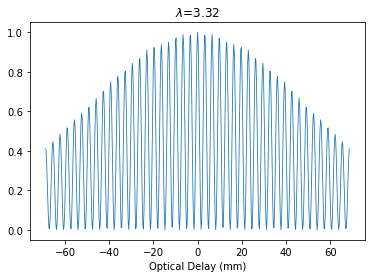

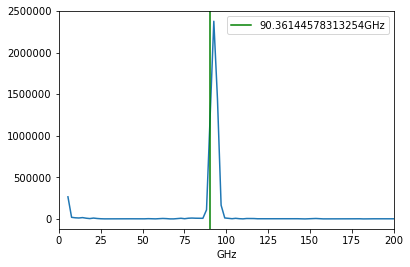

In [44]:
#pl.plot(Delay,Ij,linewidth = .8) 
#pl.savefig('SimPlot2.png',dpi= 1000)
d1 = Ij_SamePhase
D = np.hanning(int(np.shape(d1)[0]))*d1
S = np.fft.rfft(D)
#S = S[1:]
u = np.abs(S)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2

pl.plot(Delay,Ij_SamePhase/max(Ij_SamePhase),linewidth = .8) 
pl.tick_params(colors = 'black')
pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
#pl.savefig('SamePhaseInt_2.png',dpi=1000)
pl.show() 
pl.plot(300*f[3:],u[2:])
#pl.title('FFT of above',color = 'black')
pl.xlabel('GHz', color = 'black')
pl.tick_params(colors = 'black')
pl.xlim(0,200)
pl.axvline(x =float(Freq), color = 'green', label = str(Freq)+'GHz')
pl.legend()
#pl.savefig('SamePhaseSpec_2.png',dpi=1000)
pl.show()
#with one ray

In [54]:
from scipy.signal import argrelextrema
x = argrelextrema(np.array(Ij_SamePhase),np.less)
#for i in range(x):
np.array(Ij_SamePhase)[x]

array([ 293.92084898,   77.43406624,  142.81182503,  242.92149843,
         34.94863286,  241.90867525,  144.36699154,   81.73975651,
        359.98033767,   49.67358443,  451.71803631,   89.40258083,
        266.42214565,  200.24963038,  101.52291772,  372.45752488,
         16.78605375,  568.61766369,   28.07711259,  306.1718369 ,
        130.03276837,  130.03276837,  306.1718369 ,   28.07711259,
        568.61766369,   16.78605375,  372.45752488,  101.52291772,
        200.24963038,  266.42214565,   89.40258083,  451.71803631,
         49.67358443,  359.98033767,   81.73975651,  144.36699154,
        241.90867525,   34.94863286,  242.92149843,  142.81182503,
         77.43406624,  293.92084898])

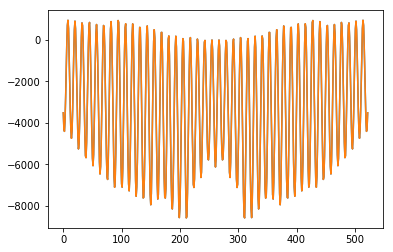

In [42]:
pl.plot(np.array(Ij)-np.array(Ij_SamePhase))
pl.show()

In [26]:
### CHECKING INITIAL PHASE IS 0
n = 5
r = 0
thetG = [0,0,0]
spo = [-160.375,-113.,-80.0]
Rays = makerays(spo,thetG,r,n) 
x = np.array([0,1,2,3,4])
Rays

[[3.8558618076866007,
  1.0,
  [-160.375, -113.0, -80.0],
  [-0.26385900878932855, -0.26516631517426553, 0.9273970286655091],
  0],
 [0.4788135027368696,
  1.0,
  [-160.375, -113.0, -80.0],
  [-0.21872448522811166, 0.14266654236714971, 0.96530091538892671],
  0],
 [2.1927005601947873,
  1.0,
  [-160.375, -113.0, -80.0],
  [-0.069025320716995506, -0.29370315884353509, 0.95340125843489698],
  0],
 [5.500257801203778,
  1.0,
  [-160.375, -113.0, -80.0],
  [0.40110051478672865, 0.19298077313821507, 0.89547573849702822],
  0],
 [3.044477060168641,
  1.0,
  [-160.375, -113.0, -80.0],
  [0.0020826460486270842, 0.038344058359941452, 0.99926242587917091],
  0]]

In [27]:
Rays2 = makerays_Zero(spo,thetG,r,n)
Rays2

[[0,
  1.0,
  [-160.375, -113.0, -80.0],
  [0.090665043194995507, -0.35301875924081805, 0.93121297540708858],
  0],
 [0,
  1.0,
  [-160.375, -113.0, -80.0],
  [-0.11285311718286724, 0.20971021934323611, 0.97122901410796092],
  0],
 [0,
  1.0,
  [-160.375, -113.0, -80.0],
  [-0.22598763874528122, -0.25690000629217091, 0.93964459978303227],
  0],
 [0,
  1.0,
  [-160.375, -113.0, -80.0],
  [-0.020692131438174555, 0.027714168940766191, 0.99940170128755934],
  0],
 [0,
  1.0,
  [-160.375, -113.0, -80.0],
  [0.17971683183934406, 0.1259282989714974, 0.97562488891570109],
  0]]